In [1]:
# import all libraries & packages
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [2]:
# Read data using pandas
df=pd.read_csv("C:/Users/kumar/OneDrive/Desktop/Data Science/Project Files/BigDatamart.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,10.596165,0.065953,141.004977,1997.830681,1308.865489
std,6.419252,0.051459,62.086938,8.371664,1699.791423
min,0.000000,0.000000,31.290000,1985.000000,0.000000
25%,6.615000,0.027036,94.012000,1987.000000,0.000000
50%,10.800000,0.054021,142.247000,1999.000000,559.272000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Checking for skewness
df.skew()

Item_Weight                 -0.260601
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

# Data Visualization

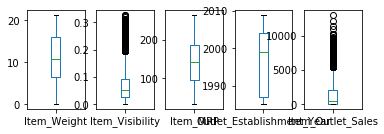

In [8]:
# Univariate plot
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

Item_Visuability & Item_Outlet_Sales colums have skewness

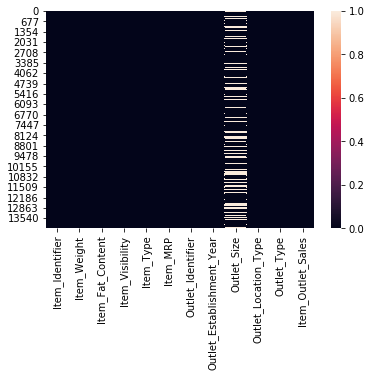

In [9]:
# Checking missing values using heatmap
sns.heatmap(df.isnull())

heatmap shoes no null value available in dataset

In [10]:
# checking correlation
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.084582,0.022245,0.524813,-0.025594
Item_Visibility,-0.084582,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.022245,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.524813,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,-0.025594,-0.075008,0.342781,-0.029489,1.000000


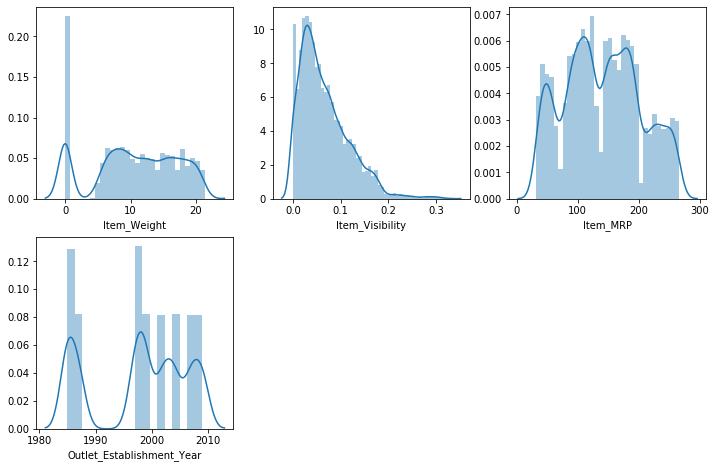

In [11]:
# Visualize happiness factor contributors using distribution plot

Outlet_Sales = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, Outlet_Sales, (3, 3))

# Data Analysis -
Output analysis of Outlet_Identifier, Outlet_Type , Outlet_Location_Type, Item_Identifier with respective to inputs

In [12]:
by_Outlet_Identifier = df.groupby('Outlet_Identifier')
by_Outlet_Identifier[['Item_Outlet_Sales'] + Outlet_Sales].mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Outlet_Identifier,,,,,
OUT027,2215.475338,0.000000,0.060344,141.012347,1985
OUT035,1463.305120,12.804468,0.060826,141.107228,2004
OUT049,1409.012781,12.803003,0.059000,141.163199,1999
OUT017,1404.708551,12.782080,0.061142,140.998931,2007
OUT013,1379.693225,12.788139,0.060242,141.128428,1987
OUT046,1366.706560,12.813313,0.060184,140.821982,1997
OUT045,1315.714132,12.797096,0.060907,140.857341,2002
OUT018,1197.815543,12.803638,0.059976,141.000899,2009
OUT019,204.197834,0.000000,0.107389,140.752386,1985


'OUT027' outlet identifier have highest outlet sales for year 1985,this sales followed by 'OUT035' in year 2004.
'OUT010' outlet identifier have least sales in year 1998.

In [13]:
by_Outlet_Type = df.groupby('Outlet_Type')
by_Outlet_Type[['Item_Outlet_Sales'] + Outlet_Sales].mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Outlet_Type,,,,,
Supermarket Type3,2215.475338,0.000000,0.060344,141.012347,1985.000000
Supermarket Type1,1389.858216,12.798026,0.060383,141.012933,1999.323004
Supermarket Type2,1197.815543,12.803638,0.059976,141.000899,2009.000000
Grocery Store,203.897100,6.520030,0.104596,140.961142,1991.662050


Outlet type 'Supermarket Type3' have highest sales in year 1985.
Outlet type 'Grocery Store' have lowest sales in year 1991.

In [14]:
by_Outlet_Location_Type = df.groupby('Outlet_Location_Type')
by_Outlet_Location_Type[['Item_Outlet_Sales'] + Outlet_Sales].mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Outlet_Location_Type,,,,,
Tier 2,1394.594636,12.794566,0.060958,140.987872,2004.330317
Tier 3,1367.858254,9.210650,0.067105,141.065888,1994.356081
Tier 1,1126.145495,9.976204,0.070160,140.939480,1995.125628


Outlet location Tier 2 have highest sales in year 2004.
Outlet location Tier 1 have lowest sales in year 1995.

In [15]:
by_Item_Identifier = df.groupby('Item_Identifier')
by_Item_Identifier[['Item_Outlet_Sales'] + Outlet_Sales].mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Identifier,,,,,
FDY55,4740.200089,13.027778,0.054325,257.209911,1997.222222
FDA15,4620.504044,8.266667,0.017235,249.542533,1998.666667
FDA04,4467.684450,9.887500,0.066792,259.008700,1998.750000
NCQ53,4313.551750,15.400000,0.018923,236.409000,1998.750000
FDD44,4090.425525,7.043750,0.068682,257.952100,1998.750000
...,...,...,...,...,...
FDF38,96.457775,10.325000,0.026383,40.188800,1998.750000
FDY43,84.223700,12.993750,0.086253,168.572400,1998.750000
FDQ04,78.431240,5.120000,0.088399,40.829600,1997.300000


Product FDY55 have highest sales in year 1997 & Product FDQ60 have lowest sales in year 1997

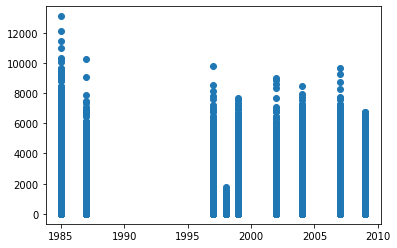

In [16]:
# draw scatter plot
plt.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
plt.show()

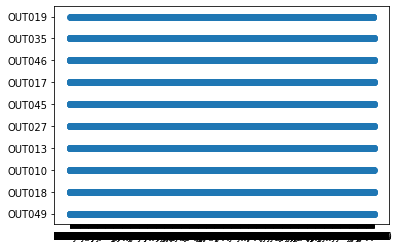

In [31]:
# draw scatter plot
plt.scatter(df['Item_Identifier'],df['Outlet_Identifier'])
plt.show()

# EDA processing - Prepare x & y using pandas & check its shape

In [22]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
# Preparing X and y using pandas
# create a Python list of feature names

feature_cols =['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
X = df[feature_cols]
X = df[['Item_Weight','Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


In [24]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(14204, 4)


In [25]:
# select a Series from the DataFrame
y = df['Item_Outlet_Sales']
y = df.Item_Outlet_Sales
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [26]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(14204,)


In [27]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10653, 4)
(3551, 4)
(10653,)
(3551,)


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

X_train = X_train.astype('int')
X_test = X_test.astype('int')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

knn = KNeighborsClassifier(n_neighbors=1)
cv=5               
scoring='accuracy'
scores = cross_val_score(knn, X_train.values, y_train, cv=5, scoring='accuracy')
print(scores)

[0.15391835 0.15344908 0.16518067 0.16150235 0.15774648]


In [40]:
# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 45,test_size=0.25)

In [41]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.25)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 56  is  0.14118277217896402


In [57]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.40411151788228666


In [59]:
# check class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0       1435
2061       5
1733       5
958        5
1438       5
        ... 
2308       1
259        1
2306       1
3878       1
490        1
Name: Item_Outlet_Sales, Length: 1468, dtype: int64

In [65]:
print(confusion_matrix(y_test,y_pred_class))

[[1435    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]


In [66]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.40      1.00      0.58      1435
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         3
          47       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          81       0.00    

Conclusion-
final F1 Score= 58 %
Accuracy Score= 40 %
Product FDY55 have highest sales in year 1997 & Product FDQ60 have lowest sales in year 1997.
Outlet identifier 'OUT027' have highest outlet sales for year 1985,this sales followed by 'OUT035' in year 2004. 'OUT010' outlet identifier have least sales in year 1998.
All 10 Outlet identifier have similar relation with products.